In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/product_info.csv'
with open(file_path, 'r') as file:
    content = file.read()

In [4]:
file_path = '/content/drive/MyDrive/product_info.csv'
df = pd.read_csv(file_path)

In [5]:

file_paths = [
    '/content/drive/MyDrive/ITD 213 Data Science Project Datasets/reviews_0-250.csv',
    '/content/drive/MyDrive/ITD 213 Data Science Project Datasets/reviews_250-500.csv',
    '/content/drive/MyDrive/ITD 213 Data Science Project Datasets/reviews_500-750.csv',
    '/content/drive/MyDrive/ITD 213 Data Science Project Datasets/reviews_750-1250.csv',
    '/content/drive/MyDrive/ITD 213 Data Science Project Datasets/reviews_1250-end.csv'
]

df_list = [pd.read_csv(file_path) for file_path in file_paths]
combined_df_reviews = pd.concat(df_list, ignore_index=True)

print(combined_df_reviews.head())


<ipython-input-5-5714d6c37b9b>:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file_path) for file_path in file_paths]


   Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “C

Text Preprocessing

In [7]:
combined_df_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [8]:
print ("Rows     : " , combined_df_reviews.shape[0])
print ("Columns  : " , combined_df_reviews.shape[1])
print ("\nFeatures : \n" , combined_df_reviews.columns.tolist())
print ("\nMissing values :  ", combined_df_reviews.isnull().sum().values.sum())
print ("\nUnique values :  \n", combined_df_reviews.nunique())

Rows     :  50000
Columns  :  19

Features : 
 ['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd']

Missing values :   126751

Unique values :  
 Unnamed: 0                  50000
author_id                   48327
rating                          5
is_recommended                  2
helpfulness                   407
total_feedback_count          144
total_neg_feedback_count       74
total_pos_feedback_count      131
submission_time              5153
review_text                 49796
review_title                24781
skin_tone                      13
eye_color                       6
skin_type                       4
hair_color                      7
product_id                      7
product_name                    7
brand_name       

In [9]:
combined_df_reviews['combined_review'] = combined_df_reviews['review_title'].fillna('') + ' ' + combined_df_reviews['review_text'].fillna('')

combined_review_column = combined_df_reviews['combined_review']

combined_df_reviews = pd.concat([combined_df_reviews, combined_review_column], ignore_index=True)

In [10]:
combined_df_reviews.drop(['Unnamed: 0', 'author_id','submission_time','review_text','review_title' ,0], axis=1, inplace=True)

In [11]:
combined_df_reviews.head()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,combined_review
0,5.0,1.0,1.0,2.0,0.0,2.0,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Taught me how to double cleanse! I use this wi...
1,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Disappointed I bought this lip mask after read...
2,5.0,1.0,NaN,0.0,0.0,0.0,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,New Favorite Routine My review title says it a...
3,5.0,1.0,NaN,0.0,0.0,0.0,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Can't go wrong with any of them I’ve always lo...
4,5.0,1.0,NaN,0.0,0.0,0.0,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,"A must have !!! If you have dry cracked lips, ..."


In [12]:
combined_df_reviews['combined_review'].fillna('', inplace=True)

print ("\nMissing values :  ", combined_df_reviews['combined_review'].isnull().sum())


Missing values :   0


In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

combined_df_reviews['tokenized_review'] = combined_df_reviews['combined_review'].apply(word_tokenize)

combined_df_reviews.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,combined_review,tokenized_review
0,5.0,1.0,1.0,2.0,0.0,2.0,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Taught me how to double cleanse! I use this wi...,"[Taught, me, how, to, double, cleanse, !, I, u..."
1,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Disappointed I bought this lip mask after read...,"[Disappointed, I, bought, this, lip, mask, aft..."
2,5.0,1.0,NaN,0.0,0.0,0.0,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,New Favorite Routine My review title says it a...,"[New, Favorite, Routine, My, review, title, sa..."
3,5.0,1.0,NaN,0.0,0.0,0.0,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Can't go wrong with any of them I’ve always lo...,"[Ca, n't, go, wrong, with, any, of, them, I, ’..."
4,5.0,1.0,NaN,0.0,0.0,0.0,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,"A must have !!! If you have dry cracked lips, ...","[A, must, have, !, !, !, If, you, have, dry, c..."


In [14]:
lemmatizer = WordNetLemmatizer()
combined_df_reviews['lemmatized_review'] = combined_df_reviews['tokenized_review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [15]:
stop_words = set(stopwords.words('english'))
combined_df_reviews['no_stopwords_review'] = combined_df_reviews['lemmatized_review'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [16]:
combined_df_reviews['no_punctuation_review'] = combined_df_reviews['no_stopwords_review'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])

In [17]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
combined_df_reviews['stemmed_review'] = combined_df_reviews['no_punctuation_review'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [18]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
combined_df_reviews['lemmatized_review'] = combined_df_reviews['no_punctuation_review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

combined_df_reviews.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,combined_review,tokenized_review,lemmatized_review,no_stopwords_review,no_punctuation_review,stemmed_review
0,5.0,1.0,1.0,2.0,0.0,2.0,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,Taught me how to double cleanse! I use this wi...,"[Taught, me, how, to, double, cleanse, !, I, u...","[Taught, double, cleanse, I, use, Nudestix, “,...","[Taught, double, cleanse, !, I, use, Nudestix,...","[Taught, double, cleanse, I, use, Nudestix, “,...","[taught, doubl, cleans, i, use, nudestix, “, c..."
1,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Disappointed I bought this lip mask after read...,"[Disappointed, I, bought, this, lip, mask, aft...","[Disappointed, I, bought, lip, mask, reading, ...","[Disappointed, I, bought, lip, mask, reading, ...","[Disappointed, I, bought, lip, mask, reading, ...","[disappoint, i, bought, lip, mask, read, revie..."
2,5.0,1.0,NaN,0.0,0.0,0.0,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,New Favorite Routine My review title says it a...,"[New, Favorite, Routine, My, review, title, sa...","[New, Favorite, Routine, My, review, title, sa...","[New, Favorite, Routine, My, review, title, sa...","[New, Favorite, Routine, My, review, title, sa...","[new, favorit, routin, my, review, titl, say, ..."
3,5.0,1.0,NaN,0.0,0.0,0.0,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Can't go wrong with any of them I’ve always lo...,"[Ca, n't, go, wrong, with, any, of, them, I, ’...","[Ca, n't, go, wrong, I, ’, always, loved, form...","[Ca, n't, go, wrong, I, ’, always, loved, form...","[Ca, n't, go, wrong, I, ’, always, loved, form...","[ca, n't, go, wrong, i, ’, alway, love, formul..."
4,5.0,1.0,NaN,0.0,0.0,0.0,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,"A must have !!! If you have dry cracked lips, ...","[A, must, have, !, !, !, If, you, have, dry, c...","[A, must, If, dry, cracked, lip, must, After, ...","[A, must, !, !, !, If, dry, cracked, lip, ,, m...","[A, must, If, dry, cracked, lip, must, After, ...","[a, must, if, dri, crack, lip, must, after, we..."


Modelling

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import nltk
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(combined_df_reviews['combined_review'])

print("Bag of Words Matrix Shape:", bow_matrix.shape)

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(combined_df_reviews['combined_review'])
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

tokenized_reviews = combined_df_reviews['no_punctuation_review'].tolist()
model_w2v = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

combined_df_reviews['pos_tags'] = combined_df_reviews['tokenized_review'].apply(pos_tag)
print("Word2Vec Model Vocabulary Size:", len(model_w2v.wv))
print("Sample POS Tags:", combined_df_reviews['pos_tags'].head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Bag of Words Matrix Shape: (100000, 20535)
TF-IDF Matrix Shape: (100000, 20535)
Word2Vec Model Vocabulary Size: 33796
Sample POS Tags: 0    [(Taught, NNP), (me, PRP), (how, WRB), (to, TO...
1    [(Disappointed, VBN), (I, PRP), (bought, VBD),...
2    [(New, NNP), (Favorite, NNP), (Routine, NNP), ...
3    [(Ca, NNP), (n't, RB), (go, VB), (wrong, JJ), ...
4    [(A, DT), (must, MD), (have, VB), (!, .), (!, ...
Name: pos_tags, dtype: object


In [20]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  if sentiment_polarity > 0:
    return 'Positive'
  elif sentiment_polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

combined_df_reviews['sentiment'] = combined_df_reviews['combined_review'].apply(get_sentiment)

combined_df_reviews = combined_df_reviews[combined_df_reviews['sentiment'] != 'Neutral']

X = combined_df_reviews['combined_review']
y = combined_df_reviews['sentiment']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Naive Bayes:
Accuracy: 0.92534281361097
              precision    recall  f1-score   support

    Negative       0.07      0.00      0.00       723
    Positive       0.93      1.00      0.96      9122

    accuracy                           0.93      9845
   macro avg       0.50      0.50      0.48      9845
weighted avg       0.86      0.93      0.89      9845

[[   1  722]
 [  13 9109]]

Decision Tree:
Accuracy: 0.9126460132046724
              precision    recall  f1-score   support

    Negative       0.41      0.41      0.41       723
    Positive       0.95      0.95      0.95      9122

    accuracy                           0.91      9845
   macro avg       0.68      0.68      0.68      9845
weighted avg       0.91      0.91      0.91      9845

[[ 293  430]
 [ 430 8692]]

Support Vector Machine:
Accuracy: 0.9433214829862875
              precision    recall  f1-score   support

    Negative       0.92      0.25      0.39       723
    Positive       0.94      1.00      0.97 

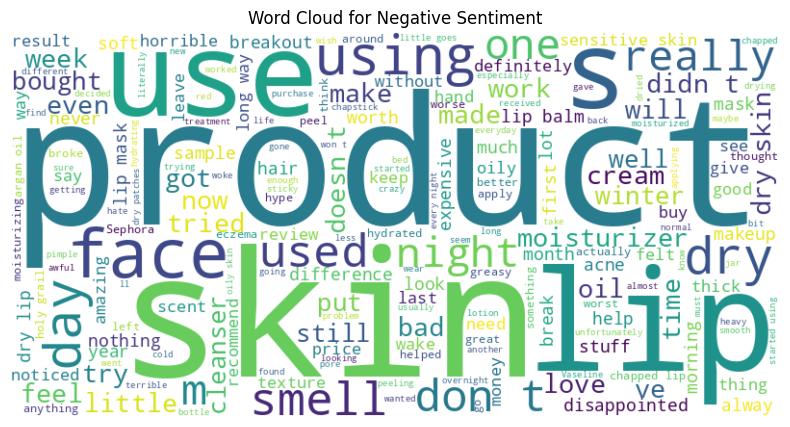

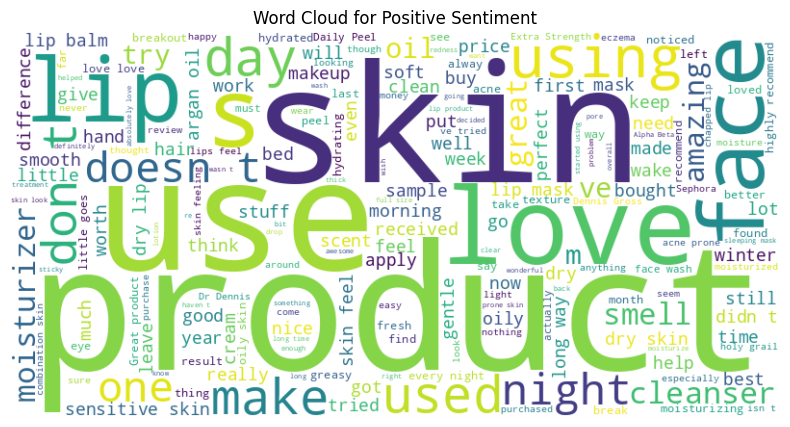

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

grouped_reviews = combined_df_reviews.groupby('sentiment')

for sentiment, group in grouped_reviews:
    text = ' '.join(review for review in group['combined_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


--- Naive Bayes ---
Accuracy: 0.92534281361097
Classification Report:
               precision    recall  f1-score   support

    Negative       0.07      0.00      0.00       723
    Positive       0.93      1.00      0.96      9122

    accuracy                           0.93      9845
   macro avg       0.50      0.50      0.48      9845
weighted avg       0.86      0.93      0.89      9845



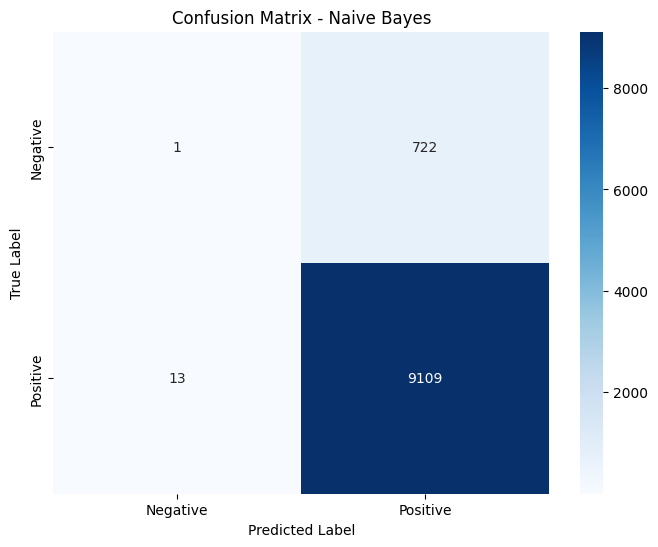



--- Decision Tree ---
Accuracy: 0.9126460132046724
Classification Report:
               precision    recall  f1-score   support

    Negative       0.41      0.41      0.41       723
    Positive       0.95      0.95      0.95      9122

    accuracy                           0.91      9845
   macro avg       0.68      0.68      0.68      9845
weighted avg       0.91      0.91      0.91      9845



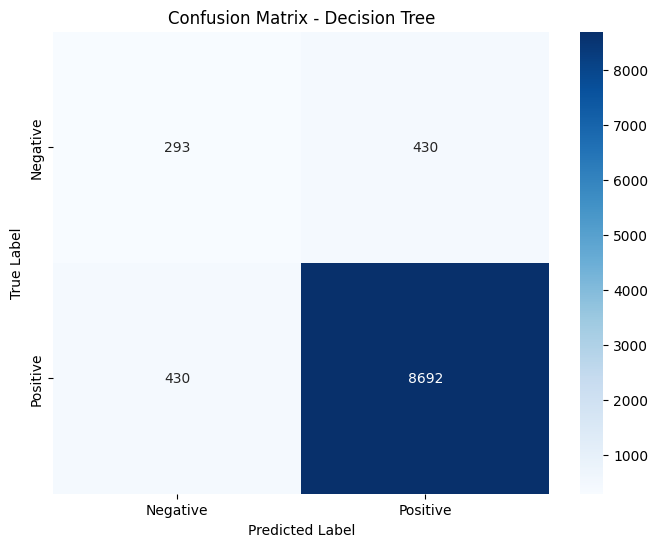



--- Support Vector Machine ---
Accuracy: 0.9433214829862875
Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.25      0.39       723
    Positive       0.94      1.00      0.97      9122

    accuracy                           0.94      9845
   macro avg       0.93      0.62      0.68      9845
weighted avg       0.94      0.94      0.93      9845



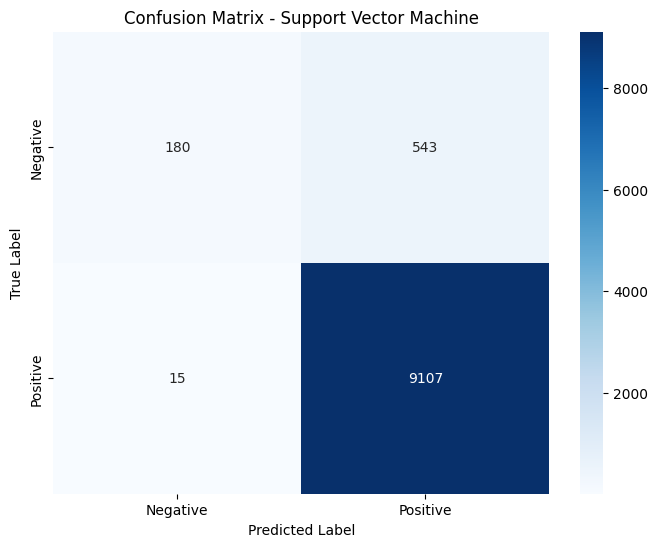

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Naive Bayes', 'Decision Tree', 'Support Vector Machine']
predictions = [y_pred_nb, y_pred_dt, y_pred_svm]

for model, pred in zip(models, predictions):
    print(f"--- {model} ---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))

    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

    print("\n")


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  # Try different kernels

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)  # 5-fold cross-validation

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred_best_svm = best_svm_model.predict(X_test)
print("Accuracy (Best SVM):", accuracy_score(y_test, y_pred_best_svm))
print("Classification Report (Best SVM):\n", classification_report(y_test, y_pred_best_svm))

Best Parameters: {'kernel': 'linear'}
Accuracy (Best SVM): 0.9556119857795835
Classification Report (Best SVM):
               precision    recall  f1-score   support

    Negative       0.88      0.46      0.60       723
    Positive       0.96      1.00      0.98      9122

    accuracy                           0.96      9845
   macro avg       0.92      0.73      0.79      9845
weighted avg       0.95      0.96      0.95      9845



In [28]:
new_reviews = [
    "I absolutely L-O-V-E this oil. I have acne prone skin in my 30’s, and use this on top of my evening cream as a final moisture lock-in. Its smell is a spa-grade aromatherapy treatment that instantly relaxes me. I’ve had facial oil in my routine, previously Drunk Elephant, for years and swear by its wrinkle prevention qualities. Oily/acne prone skin can become dry out from the acids/treatments we use, and it’s important to put the moisture back in after it’s taken off to prevent skin from over-compensating throughout the day. The formula in Lotus does just that while keeping breakouts and pesky wrinkles away. The scent of this oil won me over and I look forward to it every evening as a final pampering. It doesn’t break me out, my skin glows after application, and one bottle lasts me at least 6 months. Just a few drops is all you need to cover the face, neck and that’s all.  If you’re on the fence, treat yourself and do it!",
    "I gave this 3 stars because it give me tiny little white heads from first use ima give it few more days before making a final decision on keeping or returning it, all thought it did keep my oily face under control and I was not as oily but it feels though as it trapped the oil in my pores?!",
    "Horrible smell. Smells like Coppertone sunblock mixed with geranium extract. It is such a strong smell that I refused to even put it on my face-- I tested it on my hand (Sephora, please get testers of this) and it was so awful that I had to scrub and scrub to get rid of the smell. It is definitely not a relaxing experience."
]

new_reviews_vectorized = vectorizer.transform(new_reviews)

predictions_new = best_svm_model.predict(new_reviews_vectorized)

for review, sentiment in zip(new_reviews, predictions_new):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: I absolutely L-O-V-E this oil. I have acne prone skin in my 30’s, and use this on top of my evening cream as a final moisture lock-in. Its smell is a spa-grade aromatherapy treatment that instantly relaxes me. I’ve had facial oil in my routine, previously Drunk Elephant, for years and swear by its wrinkle prevention qualities. Oily/acne prone skin can become dry out from the acids/treatments we use, and it’s important to put the moisture back in after it’s taken off to prevent skin from over-compensating throughout the day. The formula in Lotus does just that while keeping breakouts and pesky wrinkles away. The scent of this oil won me over and I look forward to it every evening as a final pampering. It doesn’t break me out, my skin glows after application, and one bottle lasts me at least 6 months. Just a few drops is all you need to cover the face, neck and that’s all.  If you’re on the fence, treat yourself and do it!
Predicted Sentiment: Positive

Review: I gave this 3 star